<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_05_ABC_Modelo_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# Problema:

El dataset de casas de California. Es un conjunto de datos que contiene información sobre los precios medios de las viviendas y otras características de los distritos de California, basado en el censo de 1990.



**longitude**: es la longitud del centroide del distrito, expresada en grados. Esta variable indica la posición geográfica del distrito en el mapa.

**latitude**: es la latitud del centroide del distrito, expresada en grados. Esta variable también indica la posición geográfica del distrito en el mapa.

**housing_median_age**: es la edad media de las casas en el distrito, expresada en años. Esta variable refleja el estado y la antigüedad de las viviendas en el distrito.

**total_rooms**: es el número total de habitaciones en el distrito, sin distinguir entre tipos de habitaciones. Esta variable refleja el tamaño y la capacidad de las viviendas en el distrito.

**total_bedrooms**: es el número total de dormitorios en el distrito. Esta variable refleja el número de espacios destinados al descanso en las viviendas del distrito.

**population**: es el número de personas que viven en el distrito. Esta variable refleja la densidad y la demanda de vivienda en el distrito.


**households**: es el número de hogares en el distrito. Un hogar es un grupo de personas que residen dentro de una casa. Esta variable refleja la estructura y la composición de las familias en el distrito.


**median_income**: es el ingreso medio por hogar en el distrito, expresado en miles de dólares ($1000). Esta variable refleja el nivel socioeconómico y el poder adquisitivo de los habitantes del distrito.


**median_house_value**: es el valor medio de las casas en el distrito, expresado en cientos de miles de dólares ($100,000). Esta variable es la variable objetivo que se quiere predecir. Refleja el precio y la calidad de las viviendas en el distrito.


# 1.0 Análisis del data frame

1. Leer el data frame en formato csv en la dirección https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv

In [2]:
url = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv"

df = pd.read_csv(url)

2. Entender  el estado de los datos, para ello puedo emplear los comandos básicos del pandas

  ```python
  df.info()
  df.describe()
  df.isnull().sum()
  df.isna().sum()
```
Estos dos últimos son equivalentes.

In [3]:
data_info = df.info()
data_description = df.describe()
values_isnull = df.isnull().sum()
values_isna = df.isna().sum()

data_info, data_description, values_isnull, values_isna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


(None,
           longitude      latitude  housing_median_age   total_rooms  \
 count  20640.000000  20640.000000        20640.000000  20640.000000   
 mean    -119.569704     35.631861           28.639486   2635.763081   
 std        2.003532      2.135952           12.585558   2181.615252   
 min     -124.350000     32.540000            1.000000      2.000000   
 25%     -121.800000     33.930000           18.000000   1447.750000   
 50%     -118.490000     34.260000           29.000000   2127.000000   
 75%     -118.010000     37.710000           37.000000   3148.000000   
 max     -114.310000     41.950000           52.000000  39320.000000   
 
        total_bedrooms    population    households  median_income  \
 count    20433.000000  20640.000000  20640.000000   20640.000000   
 mean       537.870553   1425.476744    499.539680       3.870671   
 std        421.385070   1132.462122    382.329753       1.899822   
 min          1.000000      3.000000      1.000000       0.499900  

3. Determinar los elementos únicos dentro de la columna ocean_proximity.

In [4]:
unique_ocean_proximity = df["ocean_proximity"].unique()
unique_ocean_proximity

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

4. Para las columnas

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
```

Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.


In [5]:
cols = ["housing_median_age","total_rooms","total_bedrooms","population",
        "households","median_income","median_house_value"]

grouped_means = df.groupby("ocean_proximity")[cols].mean()
grouped_means

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,
<1H OCEAN,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


5. Construye un histograma para cada columna, puede emplear la libreria de seaborn.

In [6]:
import seaborn as sns

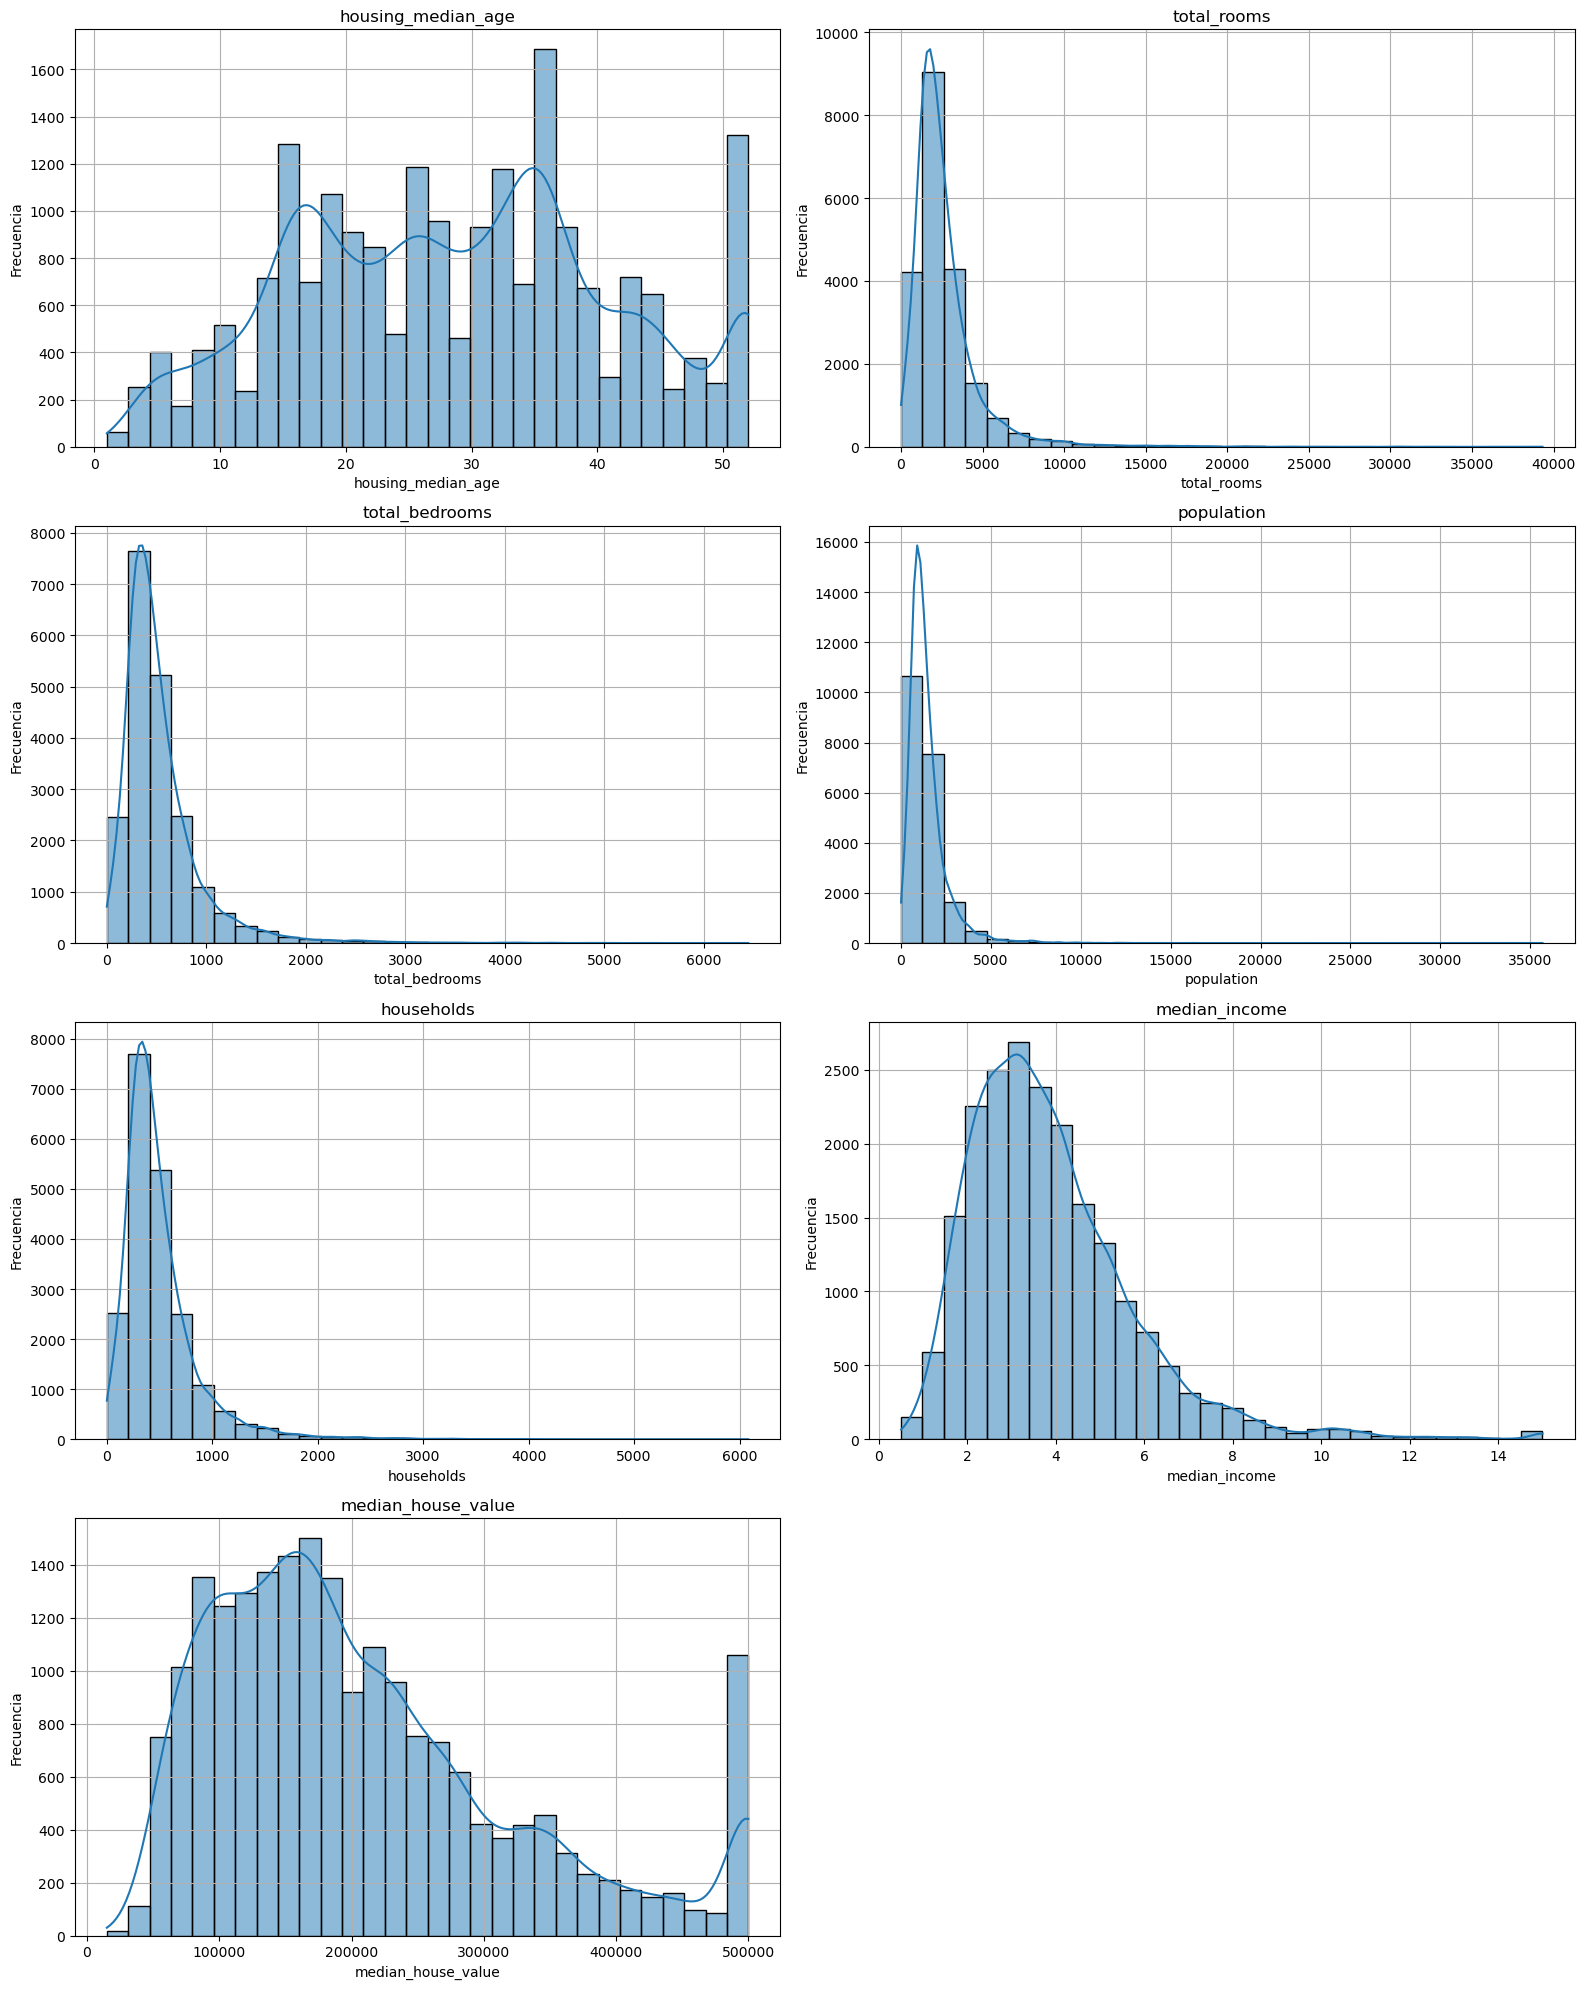

In [7]:
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.ravel()

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")
    axes[i].grid(True)

if len(cols) < 8:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

### [Diagrama de caja](https://en.wikipedia.org/wiki/Box_plot)


### Diagrama de caja

![box](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png)



### Interpretación de un diagrama de caja

- Desde el minimo al valor más bajo de la caja: primer cuartil, 25% de los datos
- Desde el valor más bajo de la caja hasta la mediana: segundo cuartil, 25% de los datos
- Desde la mediana hasta el valor mas alto de la caja : tercer cuartil, 25% de los datos
- Desde el valor mas alto de la caja hasta el máximo: Cuarto  cuartil, 25% de los datos


El rango intercuartil $IQR = Q_3-Q_1$ permite definir que datos pueden ser atípicos, basado en los siguientes limites:

$Max = Q3 + 1.5IQR$

$Min = Q1 - 1.5IQR$



El cuartil puede ser determinado como sigue:

Para calcular los cuartiles de una lista de números:

- Ordenar los números de menor a mayor.
- Calcular la posición de cada cuartil usando la fórmula: Q = a (N+1) / 4, donde Q es la posición del cuartil, a es el número del cuartil (1, 2 o 3), y N es el número total de datos.
- Si la posición del cuartil es un número entero, el valor del cuartil es el dato que está en esa posición.
- Si la posición del cuartil es un número decimal, el valor del cuartil se interpola usando la fórmula: Q = x + d (y - x), donde Q es el valor del cuartil, x es el dato anterior a la posición del cuartil, y es el dato posterior a la posición del cuartil, y d es la parte decimal de la posición del cuartil.


Veamos un ejemplo:



In [8]:
T = np.array([52, 57, 57, 58, 63, 66, 66, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 89])
Tsort = np.sort(T)
print(len(T))
print(f"T sort:{Tsort}")
len(T)/4

24
T sort:[52 57 57 58 63 66 66 67 67 68 69 70 70 70 70 72 73 75 75 76 76 78 79 89]


6.0

88.5
52.5


{'whiskers': [<matplotlib.lines.Line2D at 0x7f57581075c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f575804ddc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5758085a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f575830e360>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f575830d790>],
 'means': []}

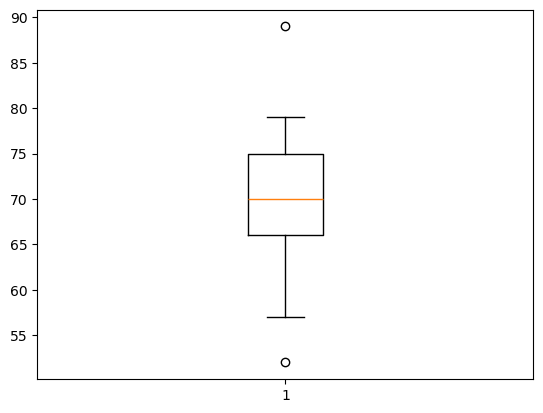

In [9]:

IQR=9
max_ = 75 + 1.5*IQR
min_ = 66 - 1.5*IQR
print(max_)
print(min_)
plt.boxplot(T)

7. Empleando el siguiente código realiza el gráfico boxplot,
```python
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()
```

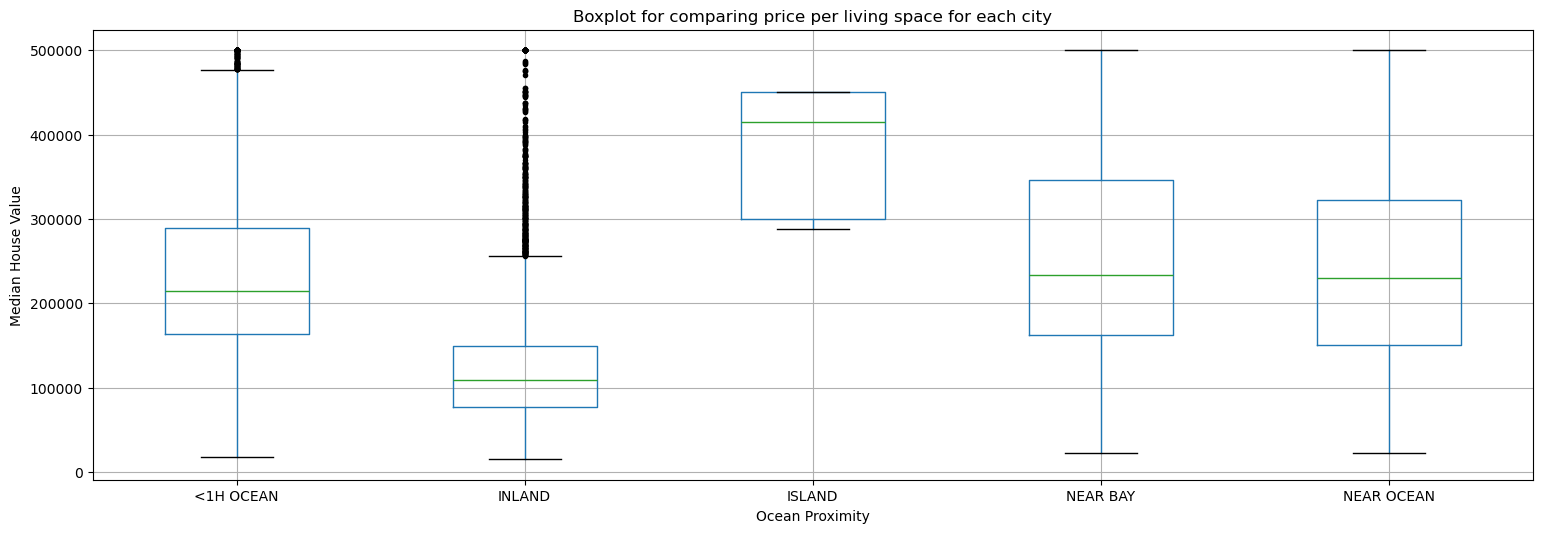

In [10]:
df.boxplot(column="median_house_value", by="ocean_proximity", sym="k.", figsize=(18, 6))

plt.title("Boxplot for comparing price per living space for each city")
plt.suptitle("")  
plt.xlabel("Ocean Proximity")
plt.ylabel("Median House Value")
plt.grid(True)
plt.show()

8. Determina la matrix de correlación.

### [Matrix de correlación](https://en.wikipedia.org/wiki/Correlation)

¿Como se determina la matrix de correlación?

![Matrix de correlación](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png)



```python
corr_matrix = df.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()
```

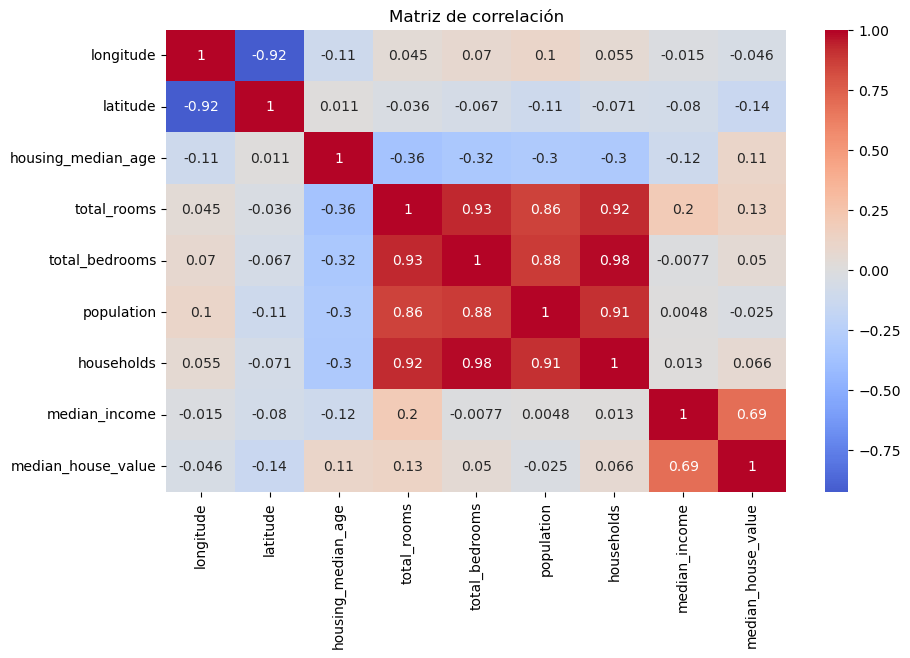

In [11]:
numeric_df = df.select_dtypes(include=["float64", "int64"])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlación")
plt.show()


9. con las columnas, realiza un grafico pairplot empleando seaborn  de python.
```python
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
```

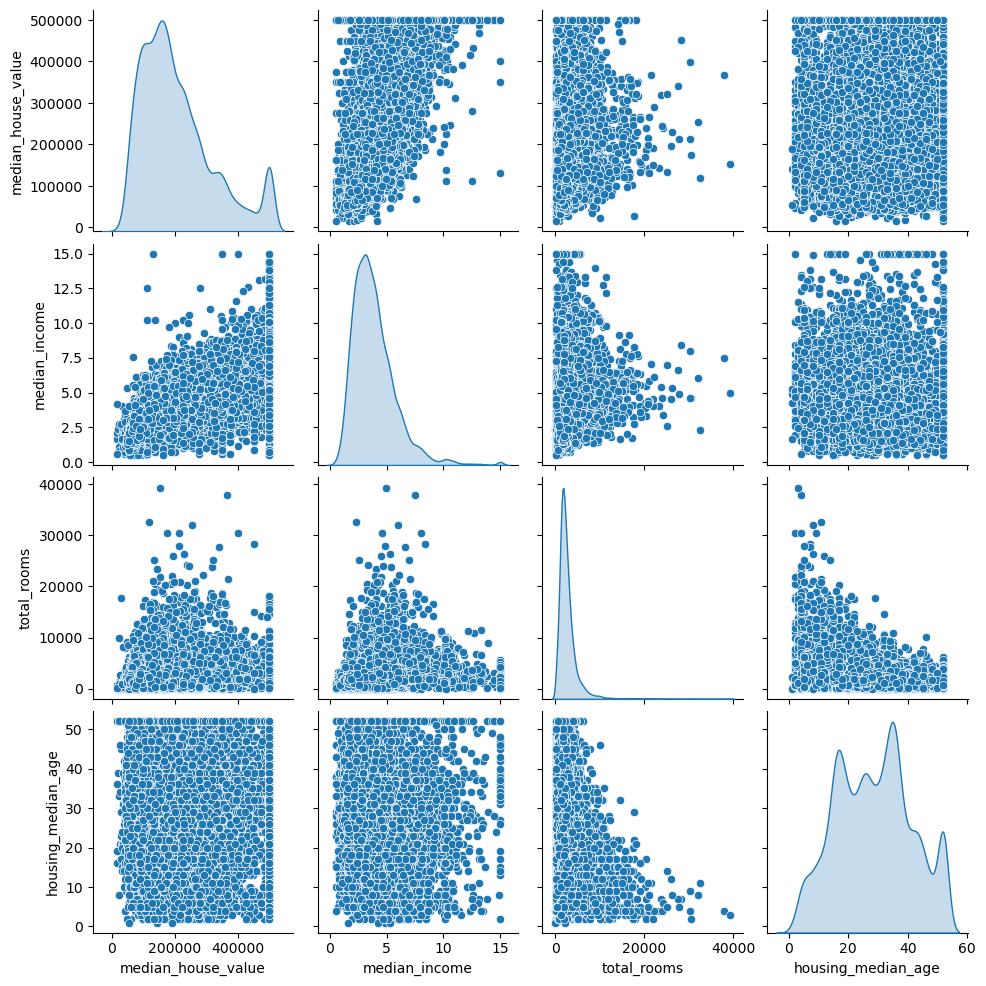

In [12]:
pairplot_cols = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

sns.pairplot(df[pairplot_cols], diag_kind="kde", kind="scatter")
plt.show()


10. Realizaun scatter plot con la libreria sea born de python, el color del grafico puede ser empleado con la columna median_house_value

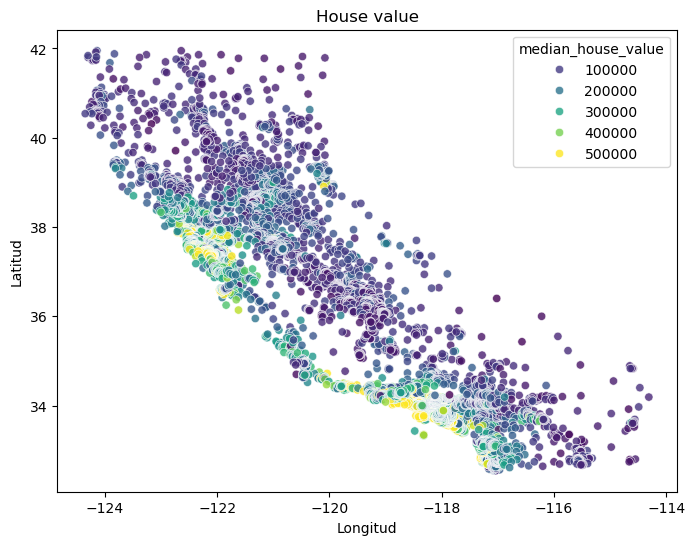

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="longitude", y="latitude", hue="median_house_value", 
                palette="viridis", alpha=0.8)
plt.title("House value")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

#2.0 Preparacion del data frame

## Evitar el data *Snooping bias*.

En algunos casos se sugiere dividir los datos en entrenamiento y test desde el principio dado que el cerebro puede sobreajustar el dataset y los resultados no significativos se pueden volver significativos. El procedimiento correcto es probar cualquier hipótesis en un conjunto de datos que no se utilizó para generar las hipótesis inicial.


## *Sampling bias*

Si el dataset es lo suficientemente grande un muestreo aleatorio de la muestra puede ser considerado, sin embargo si la muestra es pequena se debe garantizar homegeniedad en el dataset de entrenamiento.


Ejemplo:

Por ejemplo, la población de EE. UU. esta compuesto por un 51,3 % de mujeres y un 48,7 % de hombres, por lo que una encuesta bien realizada en EEUU
trata de mantener esta proporción en la muestra: 513 mujeres y 487 hombres. Esto se llama muestreo estratificado(stratified sampling): la población se divide en subgrupos homogéneos llamados estratos(strata), y se muestrea el número correcto de instancias de cada estrato para garantizar que el
El conjunto de prueba es representativo de la población general. Si usaran muestras puramente aleatorias, habría alrededor del 12% de posibilidades de muestrear un conjunto de prueba sesgado con menos del 49% de mujeres o más del 54% de mujeres. De cualquier manera, los resultados de la encuesta serían
significativamente sesgada.


11. ¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?


```python
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

```

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

16512
4128


La línea de código puede ser adecuada para dividir los datos en conjuntos de entrenamiento y prueba de manera aleatoria, dependiendo de las características del dataset. Sin embargo, si el dataset no es lo suficientemente grande, esta estrategia puede resultar inapropiada, ya que una división aleatoria no garantiza que ambos conjuntos sean representativos de la población original, lo que podría introducir un sesgo de muestreo. Además, si el dataset incluye subgrupos importantes, como género, edad o regiones geográficas, una división aleatoria podría desequilibrar la proporción de esos subgrupos entre los conjuntos de entrenamiento y prueba, afectando la capacidad del modelo para generalizar correctamente.

Para evitar este problema, es mejor usar un muestreo estratificado. Esto nos asegura que las proporciones de las características clave se mantengan consistentes en ambos conjuntos, lo que mejora la representatividad de los datos:


In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

In [18]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["ocean_proximity"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

print(len(strat_train_set))
print(len(strat_test_set))


16512
4128


12. División del dataset en grupos:


La siguiente división puede ser realizada  basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:

```python
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()


```

La forma automatica de realizar la división puede ser la siguiente:

```python
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

```


Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

```python
df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)
```

un comparativo general puede ser estructurado de la siguente forma, analiza  los errores:

```python
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
```

<Axes: >

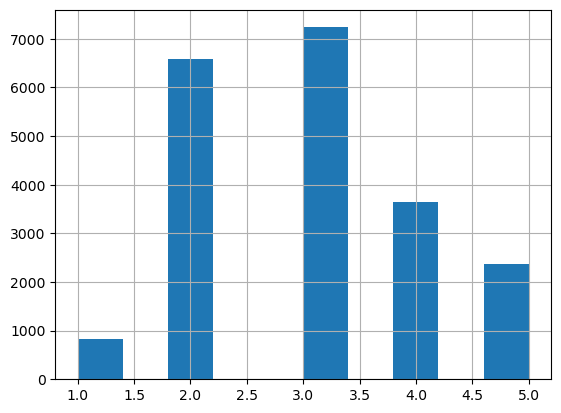

In [19]:
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

df.income_cat.hist()

In [31]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
        strat_train_set = df.loc[train_index]
        strat_test_set = df.loc[test_index]

print(strat_train_set["income_cat"].value_counts() / len(strat_train_set))
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))
print(train_set["income_cat"].value_counts() / len(train_set))

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64
income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64
income_cat
3    0.348595
2    0.317466
4    0.178537
5    0.115673
1    0.039729
Name: count, dtype: float64


In [27]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,0.015195
3,0.350581,0.350533,0.358527,2.266446,0.013820
4,0.176308,0.176357,0.167393,5.056334,0.027480
5,0.114438,0.114341,0.109496,4.318374,0.084674


El análisis de las proporciones de la columna `income_cat` reflejado en la tabla anterior muestra que el método de muestreo estratificado conserva las proporciones del dataset original con mayor precisión en comparación con el método de división aleatoria. Este último, como indican los valores en la columna `Rand. %error`, introduce discrepancias significativas que deben considerarse. Por ejemplo, en la categoría 4, el error porcentual alcanza un 5.06%, lo que evidencia que las proporciones en el conjunto de prueba aleatorio están menos alineadas con las del dataset original. Este desbalance puede introducir sesgos que comprometen la capacidad del modelo para generalizar de manera confiable y consistente.

13. Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:
```python
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]
```




# Limpieza de datos

Lo que sigue son códigos que pueden servir para limpiar los datos.

```python

df.isnull().sum()


#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()


q=pd.DataFrame(q)

q.isnull().sum()

```

##imputer

Forma automática para tratar los datos (Asegurate de trabajar con las columnas numéricas):


```python
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

df_train_num = df_train.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_
```

In [22]:
strat_train_set["rooms_per_household"] = strat_train_set["total_rooms"] / strat_train_set["households"]
strat_train_set["bedrooms_per_room"] = strat_train_set["total_bedrooms"] / strat_train_set["total_rooms"]
strat_train_set["population_per_household"] = strat_train_set["population"] / strat_train_set["households"]

In [23]:
strat_train_set.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              158
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
income_cat                    0
rooms_per_household           0
bedrooms_per_room           158
population_per_household      0
dtype: int64

In [24]:
len(strat_test_set['total_bedrooms']),len(strat_train_set["bedrooms_per_room"])

(4128, 16512)

In [25]:
median = strat_train_set["total_bedrooms"].median()
strat_train_set["total_bedrooms"] = strat_train_set["total_bedrooms"].fillna(median)


In [26]:
from sklearn.impute import SimpleImputer

strat_train_num = strat_train_set.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(strat_train_num)
imputed_data = imp_mean.transform(strat_train_num) 

14. Compara las siguientes variables:
```python
imp_mean.statistics_
df_train_num.median()
```


```python
Constuye la matriz de características:

X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
```

In [27]:
# columnas numéricas del conjunto de entrenamiento
train_num = strat_train_set.select_dtypes(include=["float64", "int64"])

In [28]:
imp_mean = SimpleImputer(strategy="median")
imp_mean.fit(train_num)

SimpleImputer(strategy='median')

In [30]:
print("Estadísticas del imputador (medianas):")
print(imp_mean.statistics_)
print("\nMedianas calculadas manualmente:")
print(train_num.median().values)

# verificar si ambas son iguales
comparison = imp_mean.statistics_ == train_num.median().values
print("\nComparación:")
print(comparison)

Estadísticas del imputador (medianas):
[-1.18510000e+02  3.42600000e+01  2.90000000e+01  2.11900000e+03
  4.33000000e+02  1.16400000e+03  4.08000000e+02  3.54155000e+00
  1.79500000e+05  5.23234164e+00  2.03027043e-01  2.81766108e+00]

Medianas calculadas manualmente:
[-1.18510000e+02  3.42600000e+01  2.90000000e+01  2.11900000e+03
  4.33000000e+02  1.16400000e+03  4.08000000e+02  3.54155000e+00
  1.79500000e+05  5.23234164e+00  2.03027043e-01  2.81766108e+00]

Comparación:
[ True  True  True  True  True  True  True  True  True  True  True  True]


Las medianas calculadas manualmente coinciden perfectamente con las estadísticas del método de imputación.

In [31]:
X = imp_mean.transform(train_num) 
housing_tr = pd.DataFrame(X, columns=train_num.columns)

housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,5.485836,0.205784,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,6.927083,0.160714,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,5.393333,0.191595,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,3.886128,0.276505,1.859213
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,6.096552,0.182692,3.167241


# Manejo de texto y atributos categóricos
15.  ¿Qué realizan las siguientes lineas de código?

```
from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)
```

El código transforma la columna categórica `ocean_proximity` del conjunto de entrenamiento en una representación numérica usando One-Hot Encoding. Esto significa que cada categoría única de la columna se convierte en una nueva columna binaria, donde el valor es `1` si el dato pertenece a esa categoría o `0` en caso contrario. Luego, esta matriz codificada se convierte en un DataFrame y se añade al conjunto de datos transformados, permitiendo que los modelos de machine learning trabajen con estas categorías de forma eficiente y sin problemas.

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
strat_train_set["ocean_proximity"].unique() # muestra valores únicos de la columna "ocean_proximity"

housing_cat = strat_train_set[["ocean_proximity"]] # selecciona la columna "ocean_proximity"

# transformar las categorías de ocean_proximity en una matriz binaria (One-Hot Encoding), 
# donde cada categoría se representa como una columna con valores 0 o 1: 
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)



[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [42]:
# convertir la matriz a un DataFrame
df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns=cat_encoder.categories_[0])

# unir el DataFrame codificado con el dataset transformado
housing_tr_ = housing_tr.join(df_cat_1hot)

# Escalamiento de variables

16. Las variables pueden ser escaladas como sigue:

```python

cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

```

In [43]:
cols = [
    "longitude", "latitude", "housing_median_age", "total_rooms",
    "total_bedrooms", "population", "households", "median_income",
    "<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"
]

housing_scale = housing_tr_[cols]


In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)

housing_prepared = pd.DataFrame(X, columns=housing_scale.columns)

housing_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.287849,0.635494,0.549020,0.098362,0.128061,0.062614,0.131441,0.115426,0.0,1.0,0.0,0.0,0.0
1,0.709163,0.058448,0.117647,0.135168,0.137403,0.056392,0.143017,0.402574,0.0,0.0,0.0,0.0,1.0
2,0.528884,0.300744,0.843137,0.041003,0.049613,0.018610,0.055639,0.163798,0.0,1.0,0.0,0.0,0.0
3,0.719124,0.022317,0.450980,0.047591,0.083280,0.025085,0.089806,0.119067,0.0,0.0,0.0,0.0,1.0
4,0.562749,0.184910,0.509804,0.089790,0.103737,0.051403,0.107916,0.275617,1.0,0.0,0.0,0.0,0.0


17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.

In [50]:
# crear una nueva columna categórica para estratificación
df["income_cat"] = pd.cut(df["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])

# división en conjunto de entrenamiento y prueba con estratificación
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

# eliminar la columna usada para estratificación
for dataset in (strat_train_set, strat_test_set):
    dataset.drop("income_cat", axis=1, inplace=True)

# limpieza de datos (manejo de valores nulos)
median_bedrooms = strat_train_set["total_bedrooms"].median()
for dataset in (strat_train_set, strat_test_set):
    dataset["total_bedrooms"].fillna(median_bedrooms, inplace=True)

# manejo de texto y atributos categóricos
cat_encoder = OneHotEncoder(sparse_output=False)
train_cat_encoded = cat_encoder.fit_transform(strat_train_set[["ocean_proximity"]])
test_cat_encoded = cat_encoder.transform(strat_test_set[["ocean_proximity"]])

# convertir a DataFrame las columnas categóricas codificadas
train_cat_df = pd.DataFrame(train_cat_encoded, columns=cat_encoder.categories_[0])
test_cat_df = pd.DataFrame(test_cat_encoded, columns=cat_encoder.categories_[0])

# agregar las columnas codificadas al conjunto original
strat_train_set = strat_train_set.join(train_cat_df).drop("ocean_proximity", axis=1)
strat_test_set = strat_test_set.join(test_cat_df).drop("ocean_proximity", axis=1)

# escalamiento de variables numéricas
scaler = MinMaxScaler()
num_cols = strat_train_set.drop("median_house_value", axis=1).columns

scaler.fit(strat_train_set[num_cols])
train_scaled = scaler.transform(strat_train_set[num_cols])
test_scaled = scaler.transform(strat_test_set[num_cols])

# crear DataFrames finales
housing_train = pd.DataFrame(train_scaled, columns=num_cols)
housing_train["median_house_value"] = strat_train_set["median_house_value"].values

housing_test = pd.DataFrame(test_scaled, columns=num_cols)
housing_test["median_house_value"] = strat_test_set["median_house_value"].values

/tmp/ipykernel_7059/1329401918.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["total_bedrooms"].fillna(median_bedrooms, inplace=True)


In [51]:
housing_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,0.287849,0.635494,0.549020,0.098362,0.128061,0.062614,0.131441,0.115426,0.0,0.0,0.0,1.0,0.0,72100.0
1,0.709163,0.058448,0.117647,0.135168,0.137403,0.056392,0.143017,0.402574,1.0,0.0,0.0,0.0,0.0,279600.0
2,0.528884,0.300744,0.843137,0.041003,0.049613,0.018610,0.055639,0.163798,1.0,0.0,0.0,0.0,0.0,82700.0
3,0.719124,0.022317,0.450980,0.047591,0.083280,0.025085,0.089806,0.119067,0.0,1.0,0.0,0.0,0.0,112500.0
4,0.562749,0.184910,0.509804,0.089790,0.103737,0.051403,0.107916,0.275617,NaN,NaN,NaN,NaN,NaN,238300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.725100,0.052072,0.254902,0.169380,0.197970,0.056700,0.186520,0.316554,0.0,1.0,0.0,0.0,0.0,268500.0
16508,0.291833,0.634431,0.274510,0.200819,0.228737,0.133580,0.264376,0.159584,0.0,0.0,0.0,0.0,1.0,90400.0
16509,0.162351,0.626993,0.921569,0.017831,0.026418,0.012753,0.031740,0.184811,NaN,NaN,NaN,NaN,NaN,140400.0
16510,0.164343,0.613177,0.254902,0.080099,0.093106,0.033773,0.093167,0.254928,NaN,NaN,NaN,NaN,NaN,258100.0


In [52]:
housing_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,0.593625,0.167906,0.549020,0.163835,0.162693,0.061128,0.178865,0.536662,NaN,NaN,NaN,NaN,NaN,500001.0
1,0.391434,0.249734,0.450980,0.051229,0.049130,0.023880,0.052465,0.311030,NaN,NaN,NaN,NaN,NaN,162500.0
2,0.587649,0.181722,0.686275,0.036806,0.043170,0.022562,0.050971,0.267858,1.0,0.0,0.0,0.0,0.0,204600.0
3,0.622510,0.145590,0.666667,0.041893,0.052030,0.029962,0.055825,0.191094,NaN,NaN,NaN,NaN,NaN,159700.0
4,0.725100,0.024442,0.725490,0.095971,0.098582,0.041817,0.114264,0.265720,NaN,NaN,NaN,NaN,NaN,184000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,0.703187,0.125399,0.352941,0.057028,0.068460,0.033745,0.068335,0.159798,NaN,NaN,NaN,NaN,NaN,110000.0
4124,0.608566,0.154091,0.627451,0.022358,0.047036,0.035511,0.052278,0.114592,NaN,NaN,NaN,NaN,NaN,118800.0
4125,0.461155,0.201913,0.823529,0.045149,0.054768,0.018498,0.066468,0.289658,NaN,NaN,NaN,NaN,NaN,293800.0
4126,0.641434,0.115834,0.568627,0.052526,0.066044,0.030214,0.076550,0.304313,NaN,NaN,NaN,NaN,NaN,335700.0


1. Qué puede concluir respecto al modelo empleado?

El modelo que se empleó nos permite analizar la relación entre las variables predictoras y el precio medio de las casas. Sin embargo, debemos tener en cuenta que su efectividad va a depender de la calidad del preprocesamiento y de si las relaciones entre las variables son lo suficientemente lineales para capturarlas adecuadamente.

2. ¿El modelo de regresión lineal es válido para lo construido?

El modelo de regresión lineal puede llegar a ser válido si las relaciones entre las variables son lineales y no hay problemas importantes como multicolinealidad o distribución no homogénea de los errores. Sin embargo, habría que evaluarlo con métricas como el error cuadrático medio y la validación cruzada para confirmar su rendimiento.

3. ¿Qué información nos da el score?

El score nos indica qué proporción de la variabilidad en el valor medio de las casas es explicada por el modelo. Un score cercano a 1 sugiere un buen ajuste, mientras que un valor bajo indica que el modelo no captura bien las relaciones entre las variables.

4. ¿Puede ser ajustado a otro modelo?

El conjunto de datos puede ser ajustado a otros modelos, como por ejemplo árboles de decisión, bosques aleatorios o redes neuronales, etc, dependiendo de la complejidad de las relaciones y la cantidad de datos disponibles. Modelos más complejos podrían capturar mejor relaciones no lineales o interacciones entre variables.

5. ¿Como puede automatizar todo el proceso empleando pipelines?

Un pipeline es una herramienta que permite encadenar de manera ordenada todos los pasos necesarios para preparar los datos y entrenar un modelo. Básicamente, es una estructura que combina operaciones como imputación de valores faltantes, escalamiento de variables, codificación de categorías y ajuste del modelo, todo en un flujo automatizado.

Lo que hace es tomar los datos crudos, aplicar cada transformación en el orden definido, y entregarlos listos al modelo para entrenar o hacer predicciones. Como cada paso está predefinido y conectado al siguiente, garantiza que las mismas operaciones se apliquen tanto al conjunto de entrenamiento como al de prueba.

Esto nos permite automatizar el proceso porque no necesitamos ejecutar manualmente cada paso por separado. Una vez definido el pipeline, solo se necesita entrenarlo con los datos y luego aplicarlo directamente a los nuevos datos. De este modo, se reduce la posibilidad de errores, se asegura la consistencia en las transformaciones y se agiliza el flujo de trabajo, especialmente cuando trabajamos con múltiples modelos o conjuntos de datos.